<a href="https://colab.research.google.com/github/saraswatiyangandul20/NetflixMoviesAndTVShowsClustering/blob/main/NetflixMoviesAndTVShowsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

innitially we start with understanding the data set, then we clean the data to make analysis ready.

explore the data and understand the behaviour of the same.

we then prepare the data for creating clusters by various parameters wherein we remove stop words, white spaces numbers etc so that we can get important words and based on that we shall form clusters.

later I have used the silhoute method and kmeans elbow method to find optimal number of clusters and built recommender system by cosine similarity and recommended top 5 movies.

# **GitHub Link -**

[GitHub link here](https://github.com/saraswatiyangandul20/NetflixMoviesAndTVShowsClustering)

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [89]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *


import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [64]:
# Load Dataset
# Load Dataset
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


# reading data file 
dir_path = '/content/drive/MyDrive/4Capstone/'
file_name = 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data_file_path = dir_path + file_name
df = pd.read_csv(data_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [65]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [66]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [67]:
# Dataset Rows & Columns count
x = df.shape
print(f'the dataset has {x[0]} rows and {x[1]} columns')

the dataset has 7787 rows and 12 columns


### Dataset Information

In [68]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [69]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [70]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)
print('-'*30)
print('Missing values in percentage')
print('-'*30)
missing_percentages = (df.isna().mean() * 100).round(2)
print(missing_percentages)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
------------------------------
Missing values in percentage
------------------------------
show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


Text(0.5, 1.0, 'Visualizing the missing values')

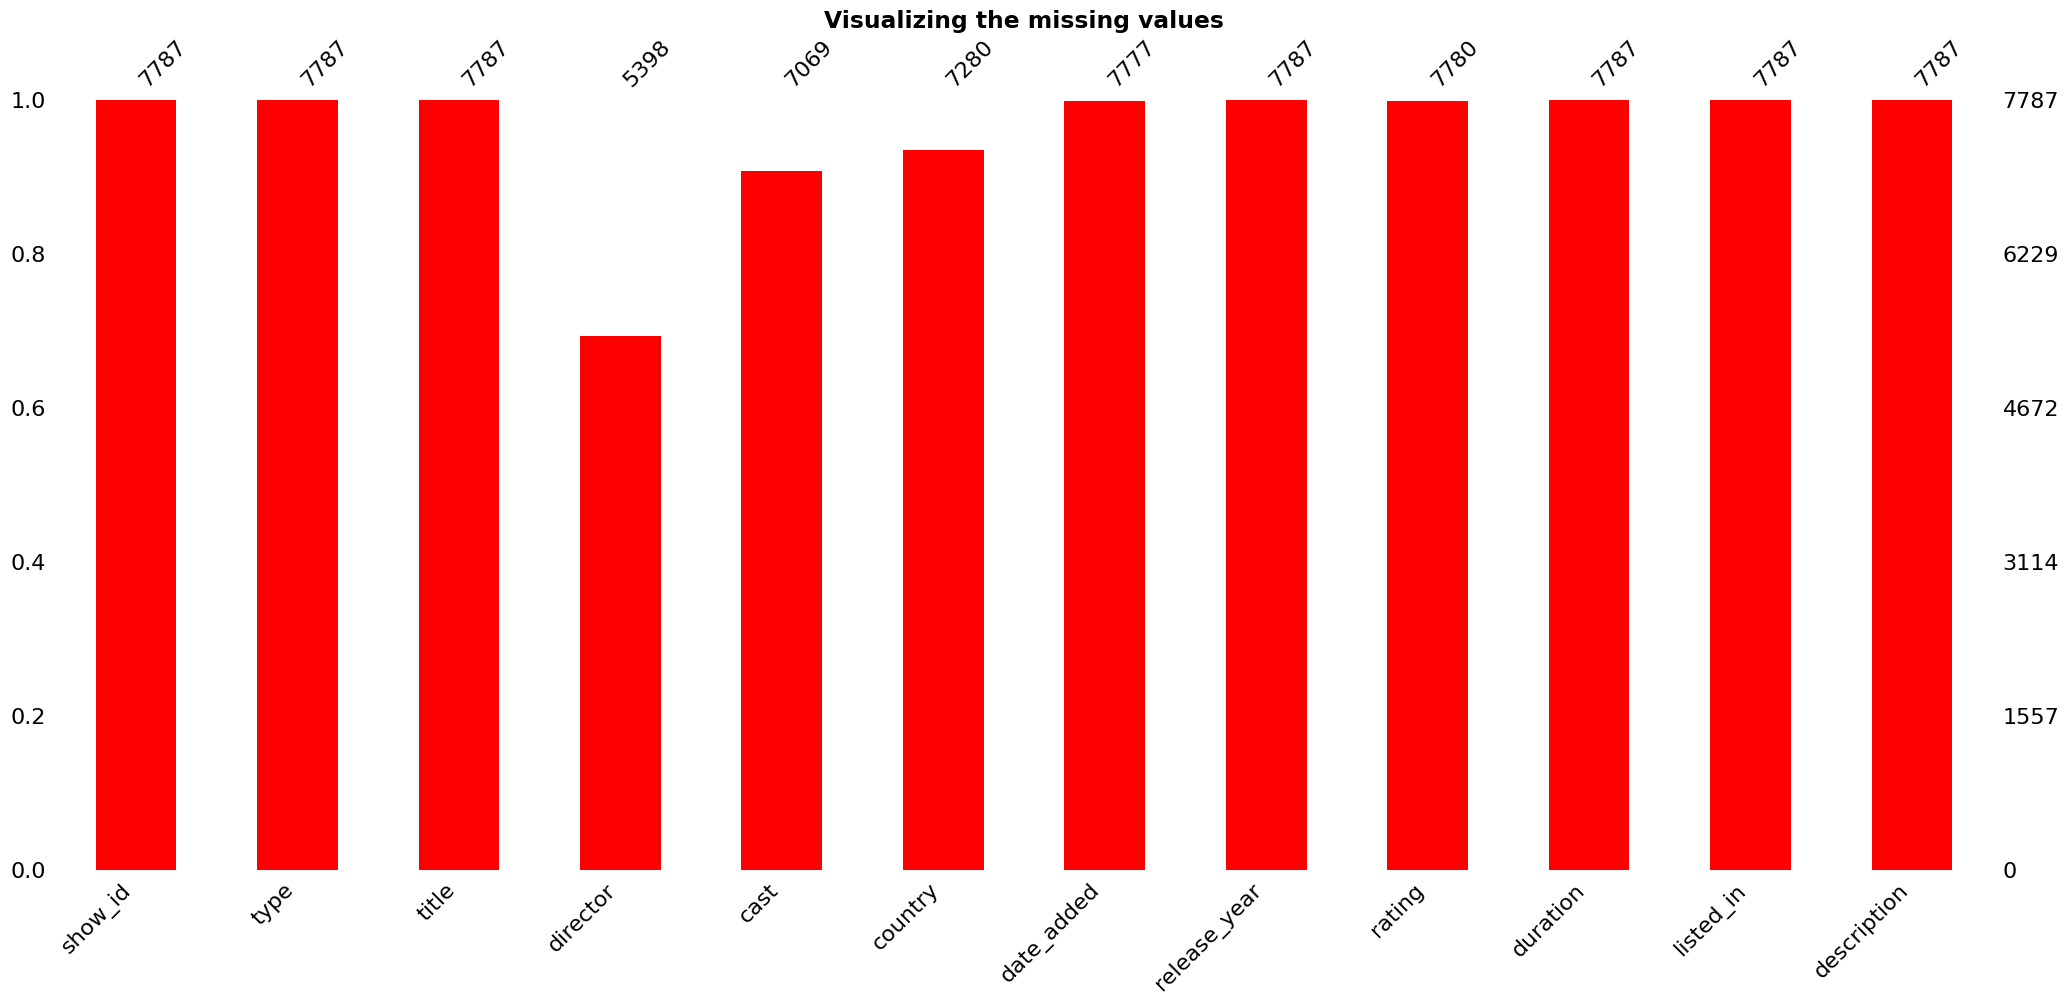

In [71]:
# Visualizing the missing values
my_palette = sns.color_palette('Reds', 1)
msno.bar(df,color = 'Red')
# msno.heatmap(df, cmap=my_palette)
plt.title('Visualizing the missing values')

### What did you know about your dataset?

**show_id**: Unique Id number for all the listed rows

**type**: denotes type of show namely TV Show or Movie

**title**: title of the movie

**director**: Name of director/directors

**cast**: lists the cast of the movie

**country**: country of the production house

**date_added**: the date the show was added

**release_year**: year of the release of the show

**rating**: show ratings

**duration**: duration of the show

**listed_in**: the genre of the show

**description**: summary/ description of the movie


## ***2. Understanding Your Variables***

In [72]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [73]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

In [74]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**show_id**: Unique Id number for all the listed rows

**type**: denotes type of show namely TV Show or Movie

**title**: title of the movie

**director**: Name of director/directors

**cast**: lists the cast of the movie

**country**: country of the production house

**date_added**: the date the show was added

**release_year**: year of the release of the show

**rating**: show ratings

**duration**: duration of the show

**listed_in**: the genre of the show

**description**: summary/ description of the movie


### Check Unique Values for each variable.

In [75]:
# Check Unique Values for each variable.
# Listing values whose count is less than 25

for column in df.columns:
  res = len(df[column].unique())
  print(f'The number of unique variables in {column} column are: {res}')
  if res<=15:
    x = df[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )

The number of unique variables in show_id column are: 7787
The number of unique variables in type column are: 2
printing unique values of type
the values are:  ['TV Show' 'Movie']
The number of unique variables in title column are: 7787
The number of unique variables in director column are: 4050
The number of unique variables in cast column are: 6832
The number of unique variables in country column are: 682
The number of unique variables in date_added column are: 1566
The number of unique variables in release_year column are: 73
The number of unique variables in rating column are: 15
printing unique values of rating
the values are:  ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']
The number of unique variables in duration column are: 216
The number of unique variables in listed_in column are: 492
The number of unique variables in description column are: 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [76]:
# Write your code to make your dataset analysis ready.

# Filling cast value as not available
df['cast'] = df['cast'].fillna(value='Not available')

# filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
df['country'] = df['country'].fillna(value='Not Known')
# df['country'] = df['country'].fillna(value=df['country'].mode())

# since date_added and rating have low % share that is 0.13 and 0.09 we are dropping the same
df = df.dropna(subset=['date_added','rating'])
# since too many missing values in director column, we are dropping the same
df = df.drop(['director'],axis=1)

In [77]:
# checking missing value again for confirmation
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

To make the data analysis ready we have done the following:
1. Filled missing values of cast with Not available
2. Filled missing values of cast with Not Known
3. Dropped rows of date_added missing values
4. Dropped rows of ratings missing values
5. Dropped the entire column of director as it had 30% of the data

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

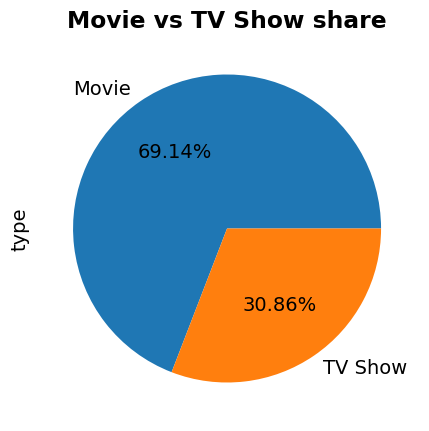

In [78]:
# Chart - 1 visualization code
spread = df['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
spread.plot(kind = 'pie', autopct='%1.2f%%', pctdistance=0.6)

#setting colum chart title
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are easy to interpret and understand the logic and share of values better in percentage.

##### 2. What is/are the insight(s) found from the chart?

69.05% of the data is of movies while 30.95% of the data belongs to TV Shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

the insights show us that most of the data is of movies

#### Chart - 2

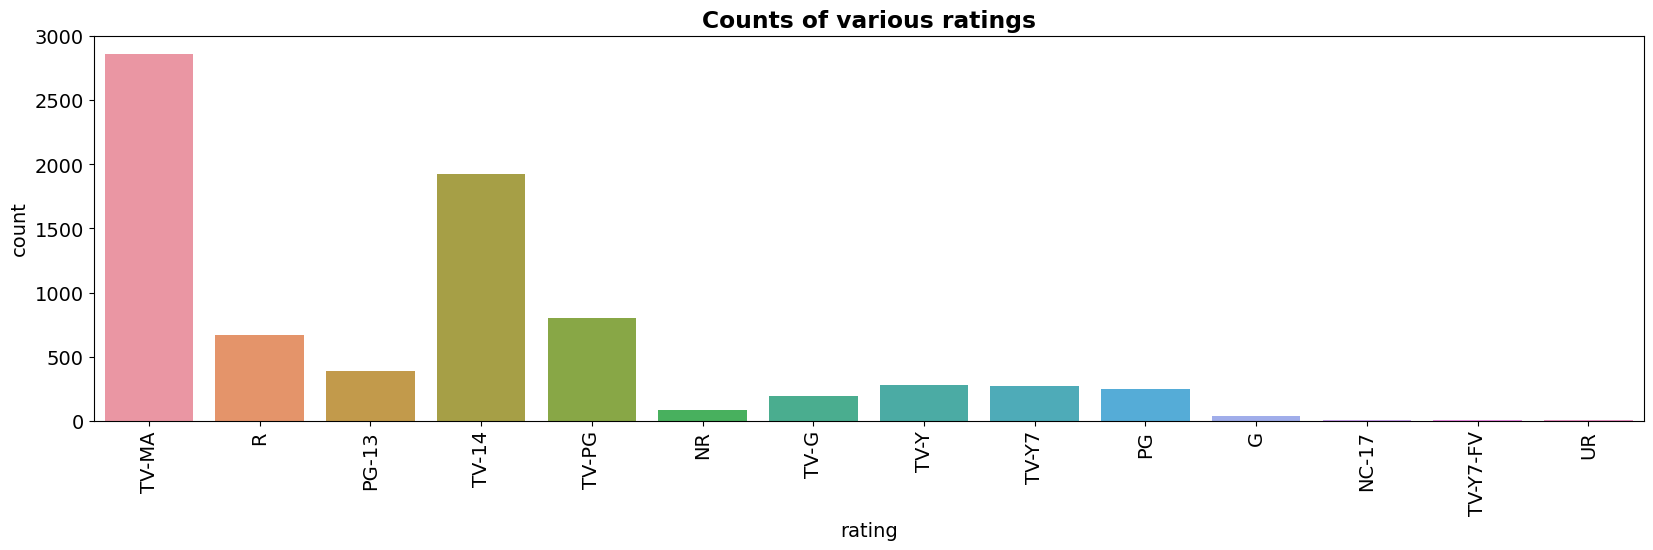

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


In [79]:
# Chart - 2 visualization code 
plt.figure(figsize=(20, 5))
sns.countplot(x='rating', data=df)

# setting chart title
plt.title('Counts of various ratings')
plt.xticks(rotation = 90)

# display chart
plt.show()

# printing the counts for reference
print(df.rating.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

It is found that most of the ratings are given by TV-MA(2863) followed by TV-14(1931) the least ratings are by NC-17(3)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Gained insites are good to understand the ratings system on the dataframe

#### Chart - 3

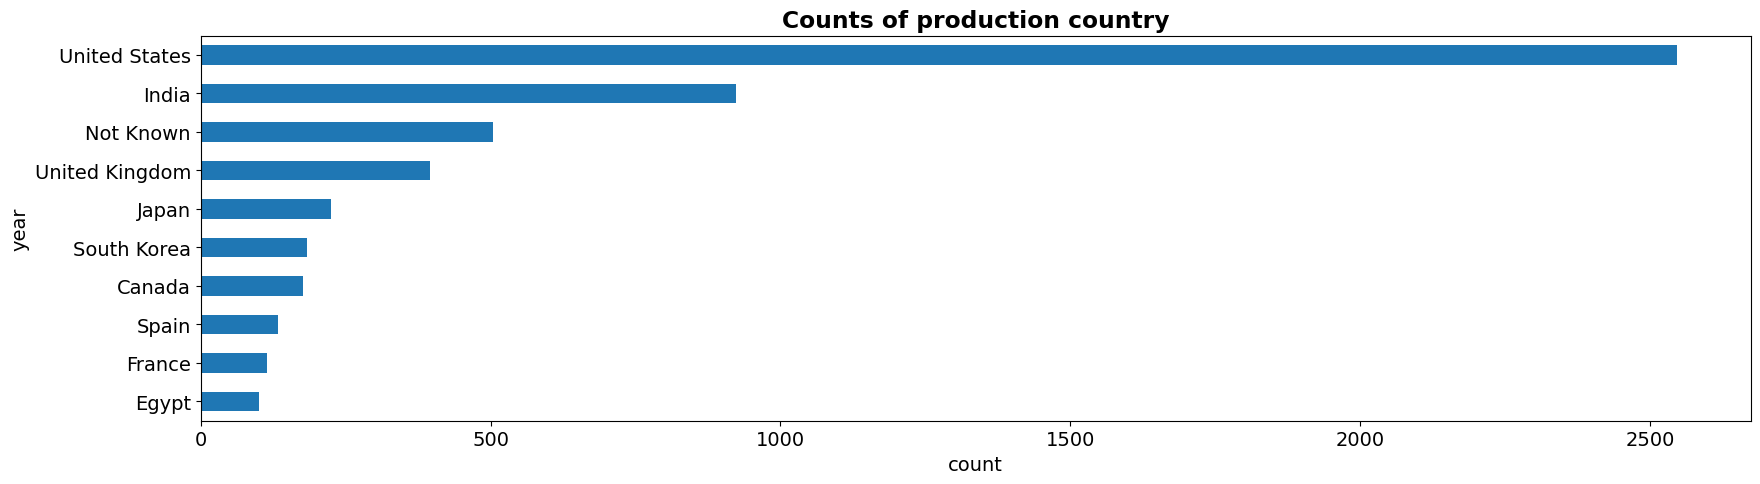

United States     2546
India              923
Not Known          505
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64


In [80]:
# Chart - 3 visualization code

plt.figure(figsize=(20, 5))
df['country'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')
# sns.countplot(x='country', data=df)

# setting chart title
plt.title('Counts of production country')
# plt.xticks(rotation = 90)
plt.ylabel('year')
plt.xlabel('count')
# display chart
plt.show()

# printing the counts for reference
print(df.country.value_counts().head(10))

##### 1. Why did you pick the specific chart?

Horizontal bar is good to visualize the data and interpret the data

##### 2. What is/are the insight(s) found from the chart?

the content belongs to United states alone is 2546, followed by India

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It helps us understand that most of the data we have belongs to United states followed by India

#### Chart - 4

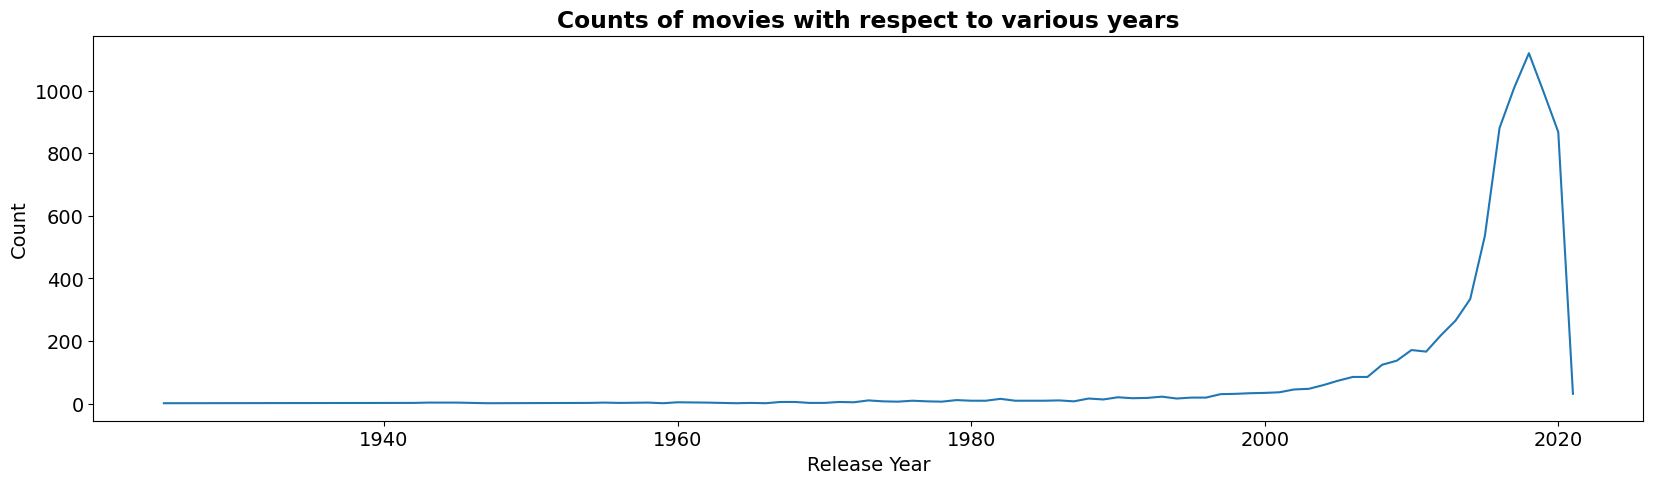

In [81]:
# Chart - 4 visualization code
# creating temp dataframe
temp_data_df = df.groupby(['release_year'])['show_id'].count()
plt.rcParams['figure.figsize'] = (20, 5)

# plotting the temp df
temp_data_df.plot.line()
# setting chart title
plt.title('Counts of movies with respect to various years')
plt.ylabel('Count')
plt.xlabel('Release Year')
# display chart
plt.show()

# deleting the temporary dataframe for optimization of memory
del temp_data_df

##### 1. Why did you pick the specific chart?

A line chart is better to understand the treands with respect to time

##### 2. What is/are the insight(s) found from the chart?

It is observed that most of the movies on netflix are of the reliese date from 2010 to 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This helps us to understand that most of the movies released are new or old, its found that most are from recently released.

#### Chart - 5

In [82]:
# seperating and creating 2 dataframe based on type
tv_shows_df = df[df['type']=='TV Show']
movies_df = df[df['type']=='Movie']

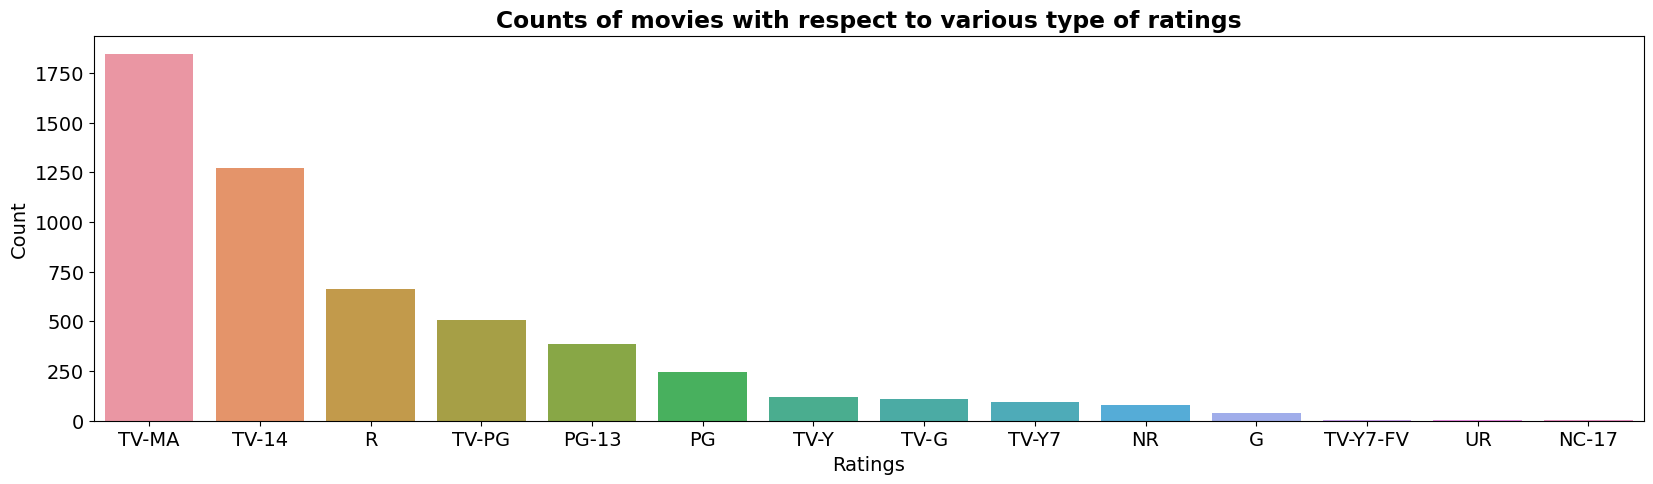

In [83]:
# Chart - 5 visualization code

movie_ratings = movies_df.groupby(['rating'])['show_id'].count().reset_index(name='count')
movie_ratings = movie_ratings.sort_values('count', ascending=False).reset_index()
# top10_movies = movies_df['listed_in'].value_counts().reset_index(name='count').head(10)
# print(top10_movies)
sns.barplot(x='rating',y='count',data=movie_ratings)

# setting chart title
plt.title('Counts of movies with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()
# print(movie_ratings)
# deleting the movie_ratings dataframe for optimization of memory
del movie_ratings

##### 1. Why did you pick the specific chart?

Bar plot is good to visualize and understand the data in this case.

##### 2. What is/are the insight(s) found from the chart?

It is found that TV-MA has more ratings that is 1845 followed by TV-14 1272 and NC-17 are least with 3 and UR with 5

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is just to understand the trends of ratings for movies

#### Chart - 6

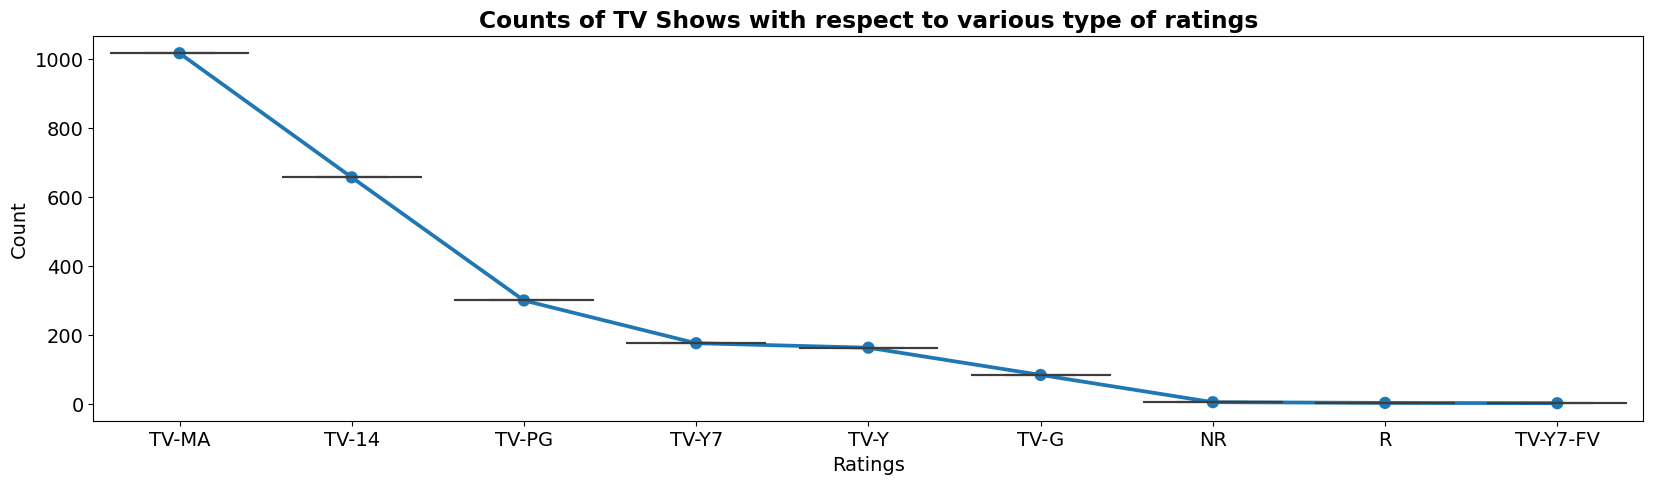

In [84]:
# Chart - 6 visualization code
tv_shows_ratings = tv_shows_df.groupby(['rating'])['show_id'].count().reset_index(name='count')
tv_shows_ratings = tv_shows_ratings.sort_values('count', ascending=False).reset_index()

sns.pointplot(x='rating',y='count',data=tv_shows_ratings)
sns.boxplot(x='rating',y='count',data=tv_shows_ratings)

# setting chart title
plt.title('Counts of TV Shows with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()
# print(tv_shows_ratings)

# deleting the movie_ratings dataframe for optimization of memory
del tv_shows_ratings

##### 1. Why did you pick the specific chart?

A scatter plot is best to undersatnd how the data is scattered in the given trends

##### 2. What is/are the insight(s) found from the chart?

It is found that TV-MA rating is max that is 1016 for the TV Shows followed by 656 for TV-14 the least ratings are by TV-Y7-FV that is 1 and R is 2

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is just to understand the trends of ratings for TV shows

#### Chart - 7

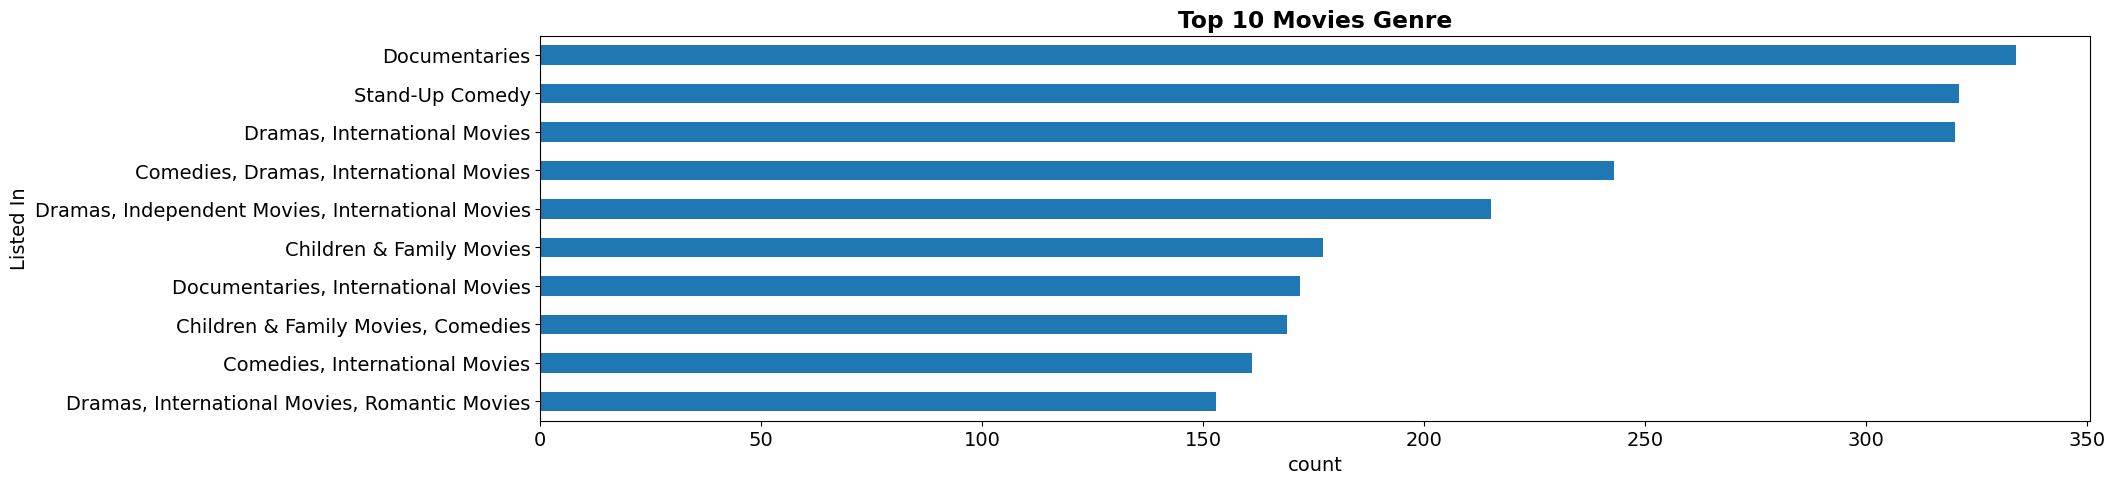

Dramas, International Movies, Romantic Movies       153
Comedies, International Movies                      161
Children & Family Movies, Comedies                  169
Documentaries, International Movies                 172
Children & Family Movies                            177
Dramas, Independent Movies, International Movies    215
Comedies, Dramas, International Movies              243
Dramas, International Movies                        320
Stand-Up Comedy                                     321
Documentaries                                       334
Name: listed_in, dtype: int64


In [85]:
# Chart - 7 visualization code
# getting counts of different movies in listed in
top10_movies = movies_df['listed_in'].value_counts()
# sorting based on counts
top10_movies = top10_movies.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_movies = top10_movies.tail(10)

# plotting
top10_movies.plot(kind='barh')
# setting chart title
plt.title('Top 10 Movies Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()

print(top10_movies)
# deleting the movie_ratings dataframe for optimization of memory
del top10_movies


##### 1. Why did you pick the specific chart?

barh is good to visualize the given scenario

##### 2. What is/are the insight(s) found from the chart?

It is found that there are 334 documentaries and 321 Standup comedy

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is just to understand the trendsof movies Genre

#### Chart - 8

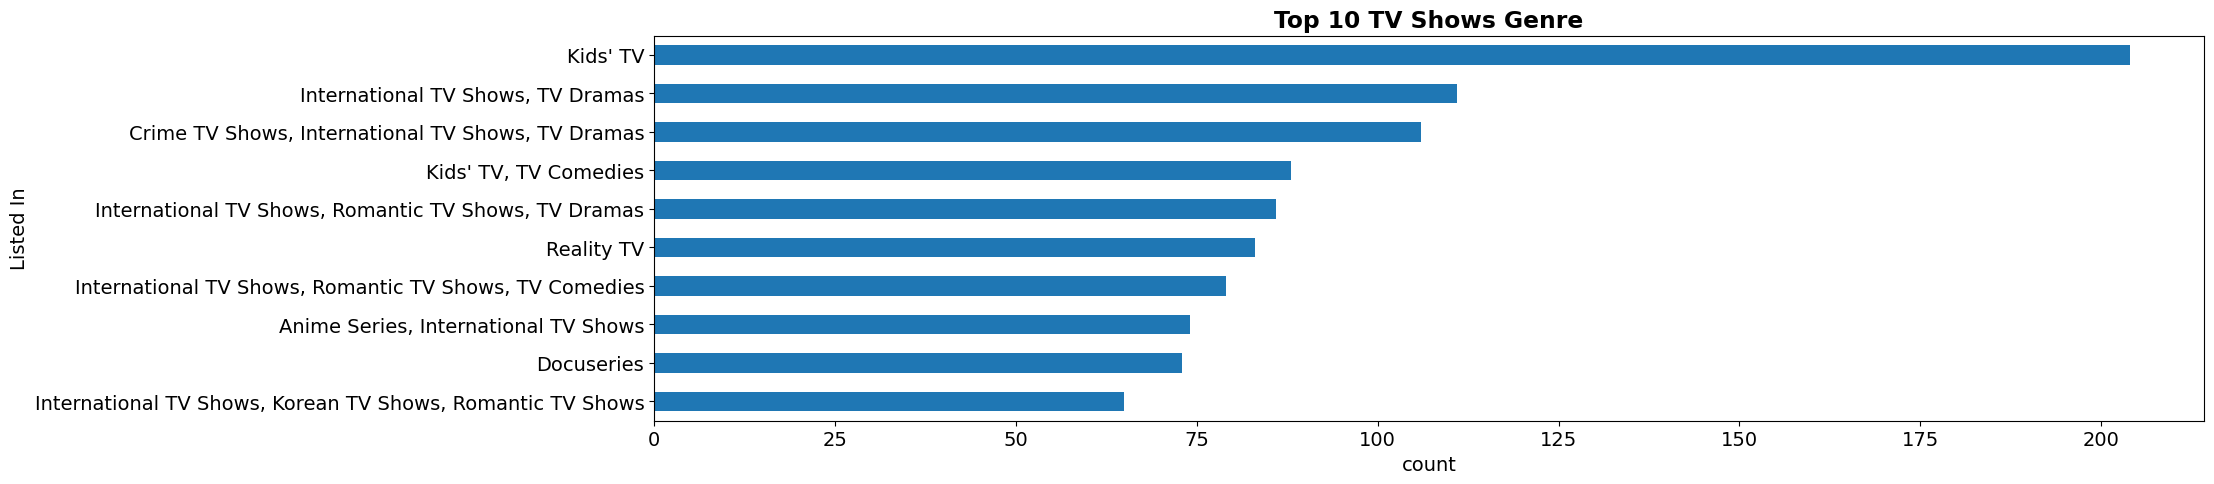

In [86]:
# Chart - 8 visualization code

# getting counts of different TV shows in listed in
top10_TV_Shows = tv_shows_df['listed_in'].value_counts()
# sorting based on counts
top10_TV_Shows = top10_TV_Shows.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_TV_Shows = top10_TV_Shows.tail(10)

# plotting
top10_TV_Shows.plot(kind='barh')
# setting chart title
plt.title('Top 10 TV Shows Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()

# print(top10_TV_Shows)
# deleting the movie_ratings dataframe for optimization of memory
del top10_TV_Shows


##### 1. Why did you pick the specific chart?

barh is good to visualize the given scenario

##### 2. What is/are the insight(s) found from the chart?

Kids' TV has max count as 204 followed by International TV Shows, TV Dramas with 111

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is just to understand the trends of TV shows Genre

#### Chart - 9

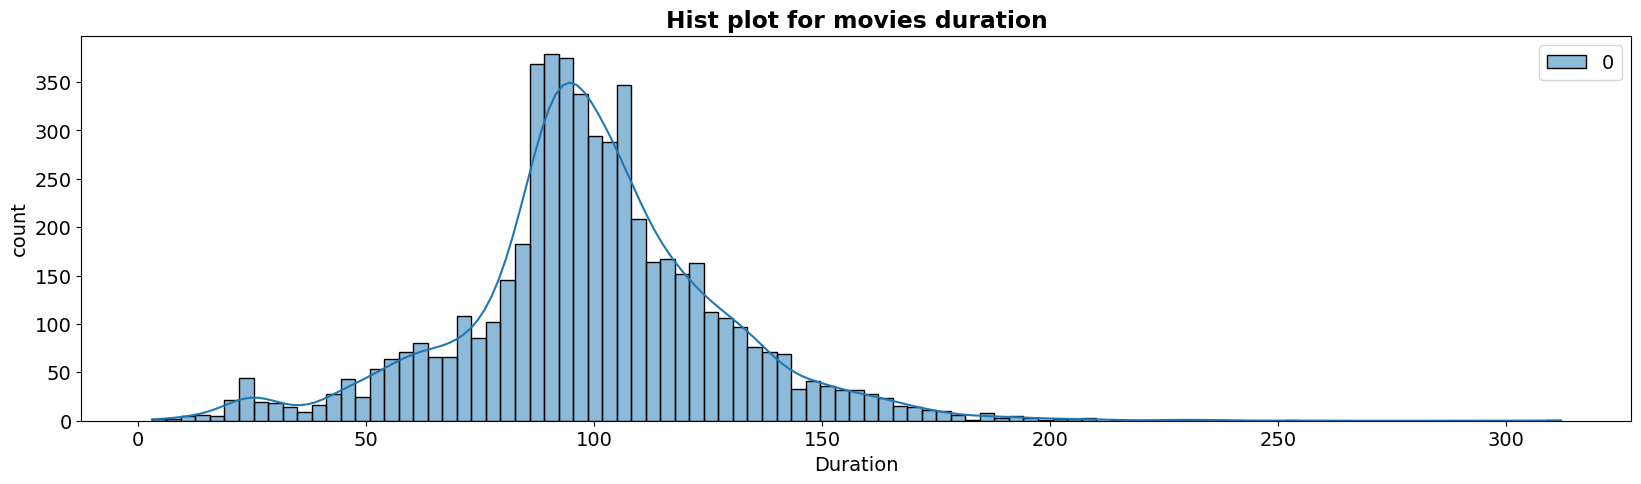

In [87]:
# Chart - 9 visualization code

sns.histplot(movies_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')

# setting chart title
plt.title('Hist plot for movies duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Hist plot shows histogram of the counts of various values

##### 2. What is/are the insight(s) found from the chart?

Most of the movies range in 90-95 mins

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

the plot is to understand what is avg time for movies

#### Chart - 10

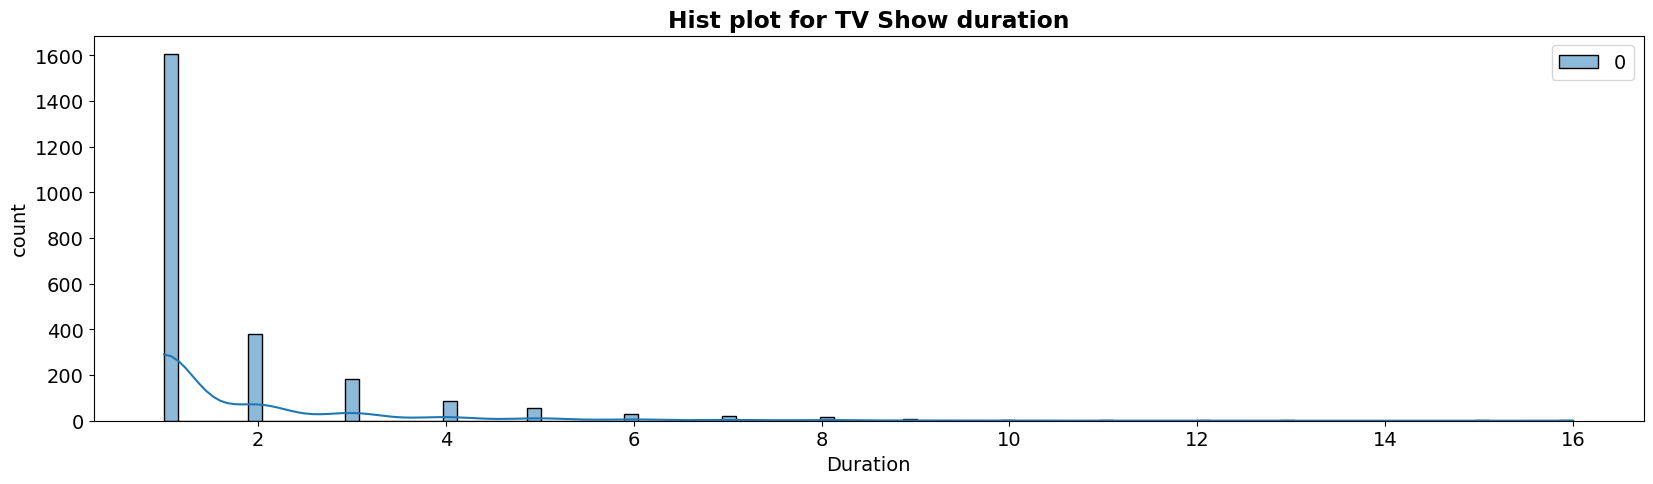

In [88]:
# Chart - 10 visualization code
sns.histplot(tv_shows_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')
# setting chart title
plt.title('Hist plot for TV Show duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Hist plot shows histogram of the counts of various values

##### 2. What is/are the insight(s) found from the chart?

The provided dataframe is not suitable to claculate the time duration for TV shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The output CSV files must be improved

#### Chart - 11

In [90]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [91]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [92]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [93]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [94]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [95]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [96]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [97]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [98]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [99]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [100]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [101]:
# Expand Contraction

#### 2. Lower Casing

In [102]:
# Lower Casing

#### 3. Removing Punctuations

In [103]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [104]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [105]:
# Remove Stopwords

In [106]:
# Remove White spaces

#### 6. Rephrase Text

In [107]:
# Rephrase Text

#### 7. Tokenization

In [108]:
# Tokenization

#### 8. Text Normalization

In [109]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [110]:
# POS Taging

#### 10. Text Vectorization

In [111]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [112]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [113]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [114]:
# Transform Your data

### 6. Data Scaling

In [115]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [116]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [117]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [118]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [119]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [120]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [121]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [122]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [123]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [124]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [125]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [126]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [127]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [128]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***